<a href="https://colab.research.google.com/github/KaviniWickramasooriya/DL-Lab_06/blob/main/Markov_Decision_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Decision Process (MDP)

### Ransalu Senanayake

In [ ]:
import copy
import timeit
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

Create the following grid world.

**States:** A 10x10 grid

**Actions:** Up, Down, Left, Right

**Tranistion probabilities:**
* 0.7 in the direction of action
* 0.1 in the three other directions
* The robot bounces back to the same state near edges

**Rewards:**
* (7,8) has a reward +10
* (2,7) has a reward +3
* (4,3) has a reward -5
* (7,3) has a reward -10
* No reward in other states

This example is based on Decision Making Under Uncertainty by M.J. Kochenderfer.

In [ ]:
#Let's define MDP paras
def createGrid10World():
    def xy2s(y, x):
        x = max(x, 0)
        y = max(y, 0)
        x = min(x, 9)
        y = min(y, 9)
        out = np.ravel_multi_index(np.array([x,y]), (10,10))
        return out

    def s2xy(s):
        x, y = np.unravel_index(s, (10,10))
        return y, x

    def gridPlot(ax, im, title='', cmap='Blues'):
        pl.imshow(im, interpolation='none', cmap=cmap, origin='lower')
        pl.colorbar()
        ax.set_xticks(np.arange(0, 10, 1));
        ax.set_yticks(np.arange(0, 10, 1));
        ax.set_xticklabels(np.arange(0, 10, 1));
        ax.set_yticklabels(np.arange(0, 10, 1));
        ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
        ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        pl.title(title);
        return

    A = ['left', 'right', 'up', 'down']
    S = np.arange(100)
    T = np.zeros((len(S), len(A), len(S)))
    R = np.zeros((len(S), len(A)))
    for s in S:
        x, y = s2xy(s)
        if x == 2 and y == 7:
            R[s, :] = 3
        elif x == 7 and y == 8:
            R[s, :] = 10
        else:
            if x == 7 and y == 3:
                R[s, :] = -10
            elif x == 4 and y == 3:
                R[s, :] = -5
            elif x == 0:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 0] = -0.7
            elif x == 9:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 1] = -0.7
            elif y == 0:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 3] = -0.7
            elif y == 9:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 2] = -0.7

            for a in A:
                if a == 'left':
                    T[s, 0, xy2s(x - 1, y)] += 0.7
                    T[s, 0, xy2s(x + 1, y)] += 0.1
                    T[s, 0, xy2s(x, y - 1)] += 0.1
                    T[s, 0, xy2s(x, y + 1)] += 0.1
                elif a == 'right':
                    T[s, 1, xy2s(x + 1, y)] += 0.7
                    T[s, 1, xy2s(x - 1, y)] += 0.1
                    T[s, 1, xy2s(x, y - 1)] += 0.1
                    T[s, 1, xy2s(x, y + 1)] += 0.1
                elif a == 'up':
                    T[s, 2, xy2s(x, y + 1)] += 0.7
                    T[s, 2, xy2s(x, y - 1)] += 0.1
                    T[s, 2, xy2s(x - 1, y)] += 0.1
                    T[s, 2, xy2s(x + 1, y)] += 0.1
                elif a == 'down':
                    T[s, 3, xy2s(x, y - 1)] += 0.7
                    T[s, 3, xy2s(x, y + 1)] += 0.1
                    T[s, 3, xy2s(x - 1, y)] += 0.1
                    T[s, 3, xy2s(x + 1, y)] += 0.1

    for a, c_x, c_y in [(0,0,0), (0,0,9),(1,9,0),(1,9,9),(2,0,9),(2,9,9),(3,0,0),(3,9,0)]:
        R[xy2s(c_x,c_y),a] = -0.8

    discount = 0.9

    nextStates = {}
    for si in range(len(S)):
        for ai in range(len(A)):
            nextStates[(si,ai)] = np.where((T[si, ai, :] != 0) == True)[0]

    return {'S':S, 'A':A, 'T':T, 'R':R, 'discount':discount, 'nextStates':nextStates, 'gridPlot':gridPlot, 'xy2s':xy2s, 's2xy':s2xy}

In [ ]:
class MDP():
    def __init__(self):
        pass

    def inbuilt_init(self, mdp_dict):
        self.S = mdp_dict['S']
        self.A = mdp_dict['A']
        self.T = mdp_dict['T']
        self.R = mdp_dict['R']
        self.discount = mdp_dict['discount']
        self.nextStates = mdp_dict['nextStates']
        self.gridPlot = mdp_dict['gridPlot']
        self.xy2s = mdp_dict['xy2s']
        self.s2xy = mdp_dict['s2xy']

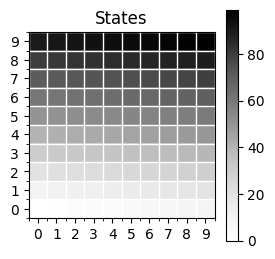

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


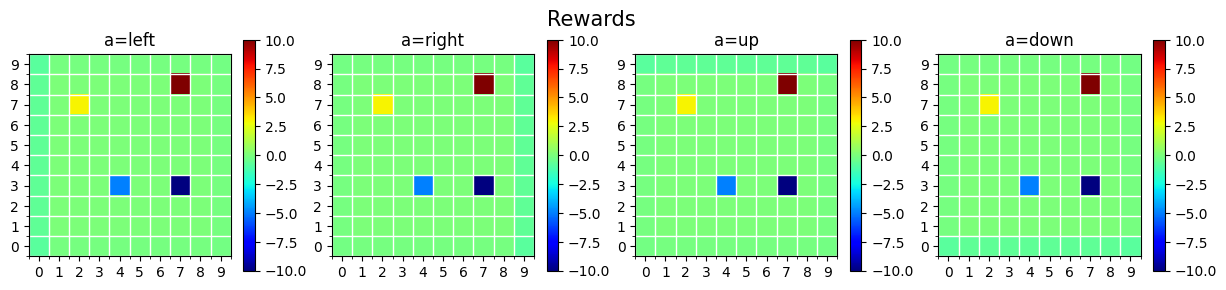

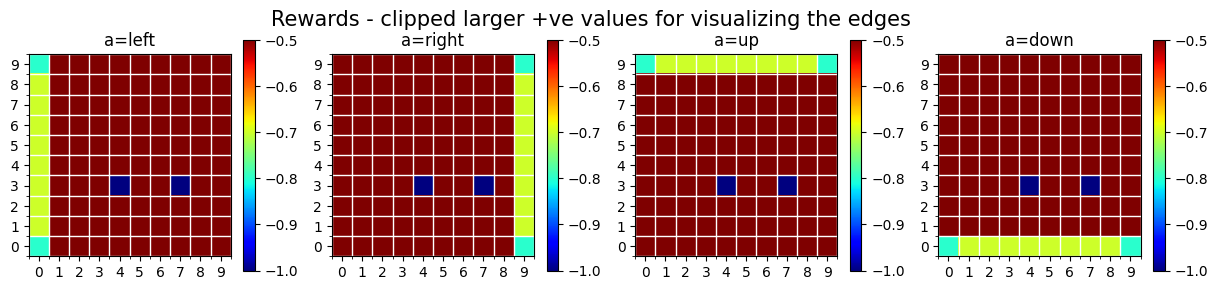

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


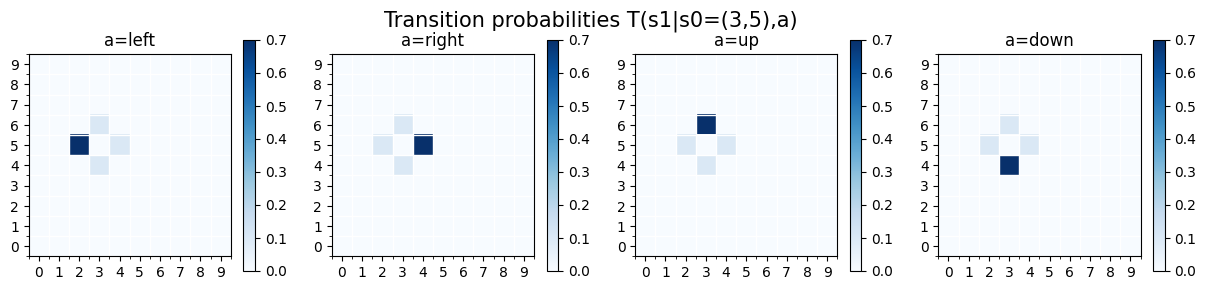

In [ ]:
#Define the MDP
mdp = MDP()
mdp.inbuilt_init(mdp_dict=createGrid10World())

#Plot states
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=mdp.S.reshape((10,10)), title='States', cmap='Greys')

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.R[:,a].reshape((10,10)), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards - clipped larger +ve values for visualizing the edges', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=np.clip(mdp.R[:,a].reshape((10,10)), -1, -0.5), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
s0_x, s0_y = 3, 5
s0 = mdp.xy2s(s0_x, s0_y)
pl.figure(figsize=(15,3))
pl.suptitle('Transition probabilities T(s1|s0=({},{}),a)'.format(s0_x, s0_y), fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title='a='+mdp.A[a], cmap='Blues')
pl.show()

In [ ]:
#An interactive plot of transition probabilities
def f(s0_x, s0_y, action):
    a = mdp.A.index(action)
    s0 = mdp.xy2s(int(s0_x), int(s0_y))
    pl.figure(figsize=(6,6))
    title = 'Transition probabilities T(s1|s0=({},{}),a={})'.format(int(s0_x),int(s0_y),action)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title=title, cmap='Blues')
    pl.show()

interactive_plot = interactive(f, s0_x='4', s0_y='5', action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']))
interactive_plot

interactive(children=(Text(value='4', description='s0_x'), Text(value='5', description='s0_y'), ToggleButtons(…

### 1. Policy evaluation

Computing the utility, U.

$U^\pi_k(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s' \mid s, \pi(s))U^\pi_{k-1}(s')$

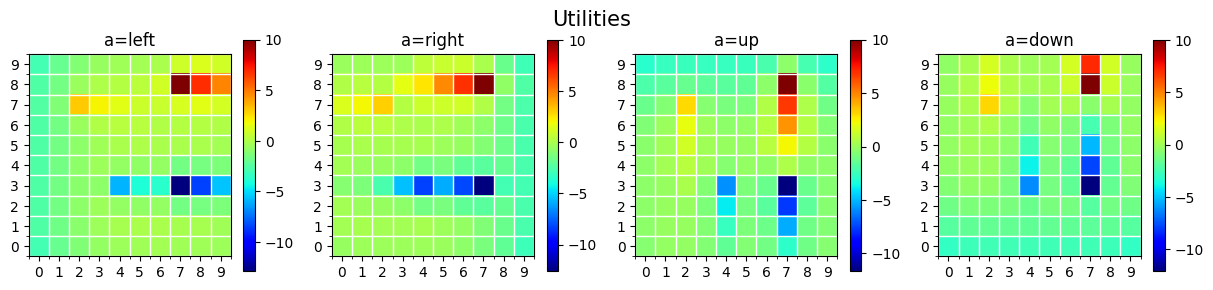

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
def iterativePolicyEvaluation(mdp, policy, numIterations=10):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        U_old = copy.copy(U)  # Store previous utilities
        for s in mdp.S:  # For each state
            a = policy  # Policy specifies a single action index for all states
            # Compute utility: U(s) = R(s, a) + γ * Σ_s' T(s, a, s') * U_old(s')
            U[s] = mdp.R[s, a] + mdp.discount * np.sum(mdp.T[s, a, :] * U_old)
    return U

numIterations = 5
pl.figure(figsize=(15,3))
pl.suptitle('Utilities', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    U = iterativePolicyEvaluation(mdp=mdp, policy=a, numIterations=numIterations)
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='a='+mdp.A[a], cmap='jet')
pl.show()
#print(np.round(U.reshape(10,10),3))

In [ ]:
def f(action, numIter=1):
    U = iterativePolicyEvaluation(mdp, policy=mdp.A.index(action), numIterations=numIter)
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    pl.show()

interactive_plot = interactive(f, action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']),
                               numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(ToggleButtons(description='action', options=('left', 'right', 'up', 'down'), value='left…

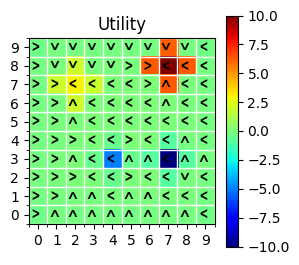

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
#Value iteration
def valueIteration(mdp, numIterations=1):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        U_old = copy.copy(U)  # Store previous utilities for synchronous update
        for s in mdp.S:  # For each state
            # Compute utility for each action: R(s, a) + γ * Σ_s' T(s, a, s') * U_old(s')
            action_values = np.zeros(len(mdp.A))
            for a in range(len(mdp.A)):
                action_values[a] = mdp.R[s, a] + mdp.discount * np.sum(mdp.T[s, a, :] * U_old)
            # Update utility with the maximum value over all actions
            U[s] = np.max(action_values)
    return U

def policyExtration(mdp, U):
    policy = np.zeros(len(mdp.S), dtype=int)  # Initialize policy vector
    for s in mdp.S:  # For each state
        # Compute value for each action: R(s, a) + γ * Σ_s' T(s, a, s') * U(s')
        action_values = np.zeros(len(mdp.A))
        for a in range(len(mdp.A)):
             action_values[a] = mdp.R[s, a] + mdp.discount * np.sum(mdp.T[s, a, :] * U)
        # Select the action with the highest value
        policy[s] = np.argmax(action_values)
    return policy

U = valueIteration(mdp, numIterations=2)
policy = policyExtration(mdp, U=U)
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
for s in range(100):
    x, y = mdp.s2xy(s)
    if policy[s] == 0:
        m='\u02C2'
    elif policy[s] == 1:
        m='\u02C3'
    elif policy[s] == 2:
        m='\u02C4'
    elif policy[s] == 3:
        m='\u02C5'
    pl.text(x-0.5,y-1,m,color='k',size=20)
pl.show()

### 2. Policy iteration

Policy evaluation can be used in policy iteration:
1. Given the current policy, compute U
2. Using U, compute a new policy

In [ ]:
def policyIteration(mdp, numIterations=1):
    U_pi_k = np.zeros(len(mdp.S)) #initial values
    pi_k = np.random.randint(low=0,high=4,size=len(mdp.S),dtype=int) #initial policy
    pi_kp1 = copy.copy(pi_k)
    for t in range(numIterations):
        #Policy evaluation: compute U_pi_k
        for _ in range(10):  # Perform 10 iterations of policy evaluation (arbitrary choice for convergence)
            U_old = copy.copy(U_pi_k)  # Store previous utilities
            for s in mdp.S:  # For each state
                a = pi_k[s]  # Current policy action for state s
                # Bellman equation: U(s) = R(s, a) + γ * Σ_s' T(s, a, s') * U_old(s')
                U_pi_k[s] = mdp.R[s, a] + mdp.discount * np.sum(mdp.T[s, a, :] * U_old)
        #Policy improvement
        for s in mdp.S:  # For each state
            action_values = np.zeros(len(mdp.A))  # Compute value for each action
            for a in range(len(mdp.A)):
                action_values[a] = mdp.R[s, a] + mdp.discount * np.sum(mdp.T[s, a, :] * U_pi_k)
            pi_kp1[s] = np.argmax(action_values)  # Update policy to maximize value
        pi_k = copy.copy(pi_kp1)  # Update policy for next iteration

    return U_pi_k, pi_kp1

U_pi_k, pi_kp1 = policyIteration(mdp, numIterations=2)

In [ ]:
def f(numIter=1):
    start_time = timeit.default_timer()
    # code you want to evaluate
    value, policy = policyIteration(mdp, numIterations=numIter)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=value.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

#Task 01 - Comparing Model-Based and Model-Free MDP Algorithms: Execution Time and Convergence


In [ ]:
# Fix the createGrid10World function to ensure transitions are set for all states (deindent the action loop)
def createGrid10World():
    def xy2s(y, x):
        x = max(x, 0)
        y = max(y, 0)
        x = min(x, 9)
        y = min(y, 9)
        out = np.ravel_multi_index(np.array([x,y]), (10,10))
        return out

    def s2xy(s):
        x, y = np.unravel_index(s, (10,10))
        return y, x

    def gridPlot(ax, im, title='', cmap='Blues'):
        pl.imshow(im, interpolation='none', cmap=cmap, origin='lower')
        pl.colorbar()
        ax.set_xticks(np.arange(0, 10, 1));
        ax.set_yticks(np.arange(0, 10, 1));
        ax.set_xticklabels(np.arange(0, 10, 1));
        ax.set_yticklabels(np.arange(0, 10, 1));
        ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
        ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        pl.title(title);
        return

    A = ['left', 'right', 'up', 'down']
    S = np.arange(100)
    T = np.zeros((len(S), len(A), len(S)))
    R = np.zeros((len(S), len(A)))
    for s in S:
        x, y = s2xy(s)
        if x == 2 and y == 7:
            R[s, :] = 3
        elif x == 7 and y == 8:
            R[s, :] = 10
        else:
            if x == 7 and y == 3:
                R[s, :] = -10
            elif x == 4 and y == 3:
                R[s, :] = -5
            elif x == 0:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 0] = -0.7
            elif x == 9:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 1] = -0.7
            elif y == 0:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 3] = -0.7
            elif y == 9:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 2] = -0.7
        # Deindented to apply to all states
        for a in A:
            if a == 'left':
                T[s, 0, xy2s(x - 1, y)] += 0.7
                T[s, 0, xy2s(x + 1, y)] += 0.1
                T[s, 0, xy2s(x, y - 1)] += 0.1
                T[s, 0, xy2s(x, y + 1)] += 0.1
            elif a == 'right':
                T[s, 1, xy2s(x + 1, y)] += 0.7
                T[s, 1, xy2s(x - 1, y)] += 0.1
                T[s, 1, xy2s(x, y - 1)] += 0.1
                T[s, 1, xy2s(x, y + 1)] += 0.1
            elif a == 'up':
                T[s, 2, xy2s(x, y + 1)] += 0.7
                T[s, 2, xy2s(x, y - 1)] += 0.1
                T[s, 2, xy2s(x - 1, y)] += 0.1
                T[s, 2, xy2s(x + 1, y)] += 0.1
            elif a == 'down':
                T[s, 3, xy2s(x, y - 1)] += 0.7
                T[s, 3, xy2s(x, y + 1)] += 0.1
                T[s, 3, xy2s(x - 1, y)] += 0.1
                T[s, 3, xy2s(x + 1, y)] += 0.1

    for a, c_x, c_y in [(0,0,0), (0,0,9),(1,9,0),(1,9,9),(2,0,9),(2,9,9),(3,0,0),(3,9,0)]:
        R[xy2s(c_x,c_y),a] = -0.8

    discount = 0.9

    nextStates = {}
    for si in range(len(S)):
        for ai in range(len(A)):
            nextStates[(si,ai)] = np.where((T[si, ai, :] != 0) == True)[0]

    return {'S':S, 'A':A, 'T':T, 'R':R, 'discount':discount, 'nextStates':nextStates, 'gridPlot':gridPlot, 'xy2s':xy2s, 's2xy':s2xy}

# Re-initialize MDP with fixed grid
mdp = MDP()
mdp.inbuilt_init(createGrid10World())

In [ ]:
# Model-Based: Value Iteration (with tracking for convergence)
def value_iteration(mdp, tol=1e-3, max_iter=1000):
    V = np.zeros(len(mdp.S))
    it = 0
    deltas = []
    for it in range(max_iter):
        delta = 0
        for s in mdp.S:
            v = V[s]
            max_a = max(sum(mdp.T[s, a, s2] * (mdp.R[s, a] + mdp.discount * V[s2]) for s2 in mdp.S) for a in range(len(mdp.A)))
            V[s] = max_a
            delta = max(delta, abs(v - V[s]))
        deltas.append(delta)
        if delta < tol:
            break
    return V, deltas, it + 1

# Model-Based: Policy Iteration (with tracking for convergence)
def policy_evaluation(V, policy, mdp, tol=1e-4):
    while True:
        delta = 0
        for s in mdp.S:
            v = V[s]
            a = policy[s]
            V[s] = sum(mdp.T[s, a, s2] * (mdp.R[s, a] + mdp.discount * V[s2]) for s2 in mdp.S)
            delta = max(delta, abs(v - V[s]))
        if delta < tol:
            break
    return V

def policy_improvement(V, policy, mdp):
    policy_stable = True
    for s in mdp.S:
        old_action = policy[s]
        policy[s] = np.argmax([sum(mdp.T[s, a, s2] * (mdp.R[s, a] + mdp.discount * V[s2]) for s2 in mdp.S) for a in range(len(mdp.A))])
        if old_action != policy[s]:
            policy_stable = False
    return policy, policy_stable

def policy_iteration(mdp, tol=1e-3, max_iter=1000):
    V = np.zeros(len(mdp.S))
    policy = np.zeros(len(mdp.S), dtype=int)
    it = 0
    policy_changes = []
    for it in range(max_iter):
        V = policy_evaluation(V, policy, mdp, tol)
        policy, stable = policy_improvement(V, policy, mdp)
        policy_changes.append(not stable)
        if stable:
            break
    return V, policy, policy_changes, it + 1

In [ ]:
# Model-Free: Q-Learning (with tracking for convergence)
def sample_next(mdp, s, a):
    next_s = np.random.choice(mdp.S, p=mdp.T[s, a])
    r = mdp.R[s, a]
    return next_s, r

def q_learning(mdp, num_steps=100000, alpha=0.1, epsilon=0.1):
    Q = np.zeros((len(mdp.S), len(mdp.A)))
    state = np.random.choice(mdp.S)
    updates = 0
    deltas = []
    delta = 0
    for t in range(num_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(len(mdp.A))
        else:
            action = np.argmax(Q[state])
        next_state, reward = sample_next(mdp, state, action)
        best_next = np.max(Q[next_state])
        old_q = Q[state, action]
        Q[state, action] += alpha * (reward + mdp.discount * best_next - Q[state, action])
        delta += abs(Q[state, action] - old_q)
        updates += 1
        if updates % 100 == 0:
            deltas.append(delta / 100)
            delta = 0
        state = next_state
    return Q, deltas, num_steps

Value Iteration: execution time = 1.2223 seconds, iterations to converge = 52
Policy Iteration: execution time = 1.2262 seconds, iterations to converge = 5
Policy Iteration policy changes per iteration: [True, True, True, True, False]
Q-Learning: execution time = 3.3267 seconds, total steps = 100000


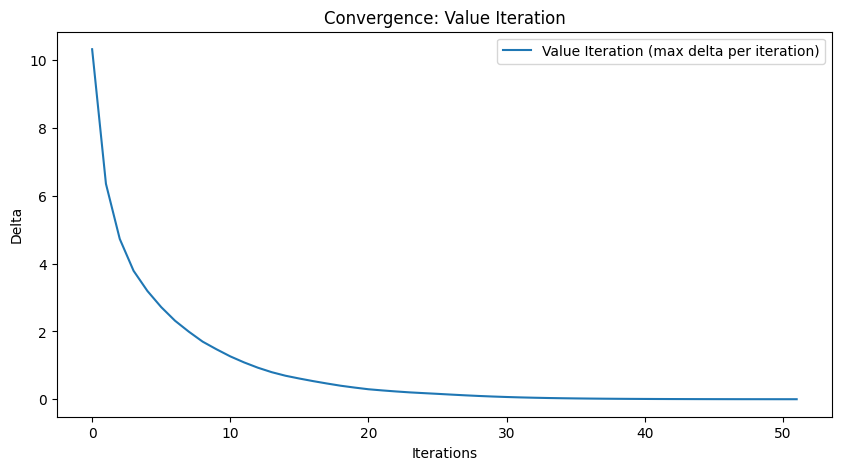

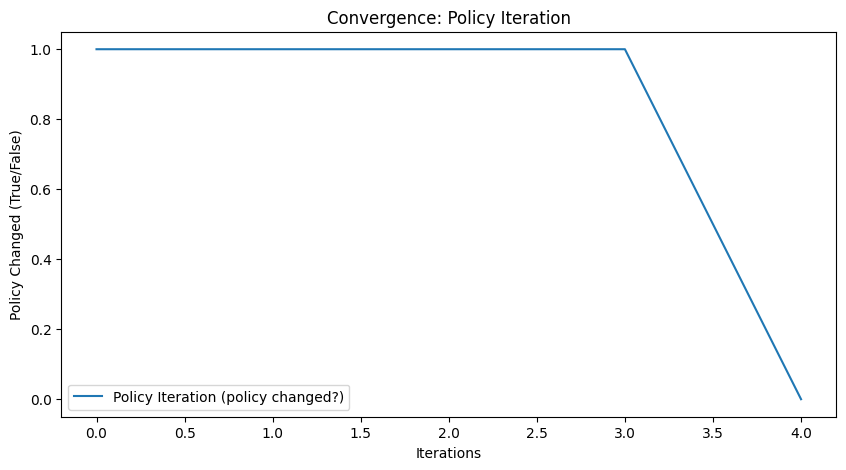

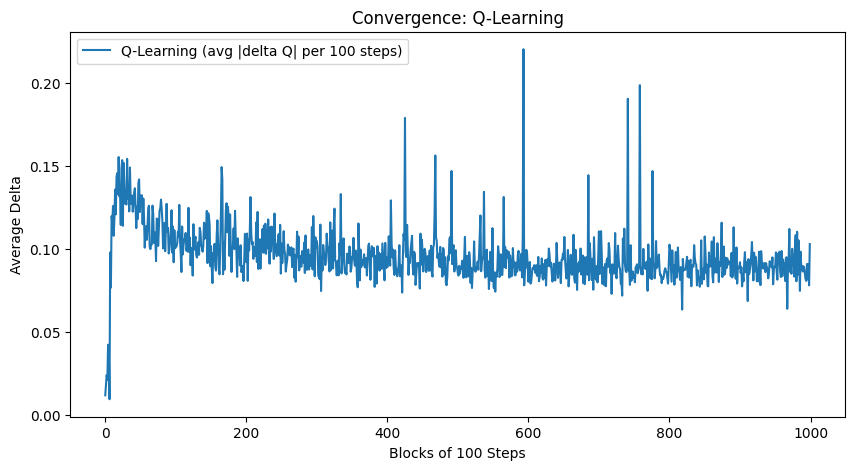

In [ ]:
# Run and compare execution time and convergence
import time

# Value Iteration
start = time.time()
V_vi, deltas_vi, iter_vi = value_iteration(mdp)
time_vi = time.time() - start
print(f"Value Iteration: execution time = {time_vi:.4f} seconds, iterations to converge = {iter_vi}")

# Policy Iteration
start = time.time()
V_pi, pi_pi, changes_pi, iter_pi = policy_iteration(mdp)
time_pi = time.time() - start
print(f"Policy Iteration: execution time = {time_pi:.4f} seconds, iterations to converge = {iter_pi}")
print(f"Policy Iteration policy changes per iteration: {changes_pi}")

# Q-Learning
start = time.time()
Q_ql, deltas_ql, steps_ql = q_learning(mdp)
time_ql = time.time() - start
print(f"Q-Learning: execution time = {time_ql:.4f} seconds, total steps = {steps_ql}")

# Plot convergence curves
pl.figure(figsize=(10, 5))
pl.plot(deltas_vi, label='Value Iteration (max delta per iteration)')
pl.xlabel('Iterations')
pl.ylabel('Delta')
pl.title('Convergence: Value Iteration')
pl.legend()
pl.show()

pl.figure(figsize=(10, 5))
pl.plot(range(len(changes_pi)), changes_pi, label='Policy Iteration (policy changed?)')
pl.xlabel('Iterations')
pl.ylabel('Policy Changed (True/False)')
pl.title('Convergence: Policy Iteration')
pl.legend()
pl.show()

pl.figure(figsize=(10, 5))
pl.plot(deltas_ql, label='Q-Learning (avg |delta Q| per 100 steps)')
pl.xlabel('Blocks of 100 Steps')
pl.ylabel('Average Delta')
pl.title('Convergence: Q-Learning')
pl.legend()
pl.show()

#Task 02

##Model-Based vs. Model-Free

Model-Based Algorithms
* Learn or use a model of the environment (state transition probabilities + rewards).
* Use this model to plan optimal actions (via Bellman equations).
* Usually sample-efficient (need fewer interactions with the environment).
* But can be computationally expensive because they must evaluate all states and actions.
* Best when the environment dynamics are known or can be easily learned.

Examples: Policy Iteration, Value Iteration, Dynamic Programming.

Model-Free Algorithms
* Do not learn the environment’s transition probabilities.
* Learn the value function or Q-values directly through experience.
* Require more interactions (less sample-efficient) but are simpler to implement.
* Work well even when the environment model is unknown or too complex to calculate.

Examples: Q-Learning, SARSA, Deep Q-Networks (DQN).